# Importer les librairies

In [ ]:
# INSTALLATION SI BESOIN
%pip install scipy
%pip install pandas
%pip install seaborn
%pip install matplotlib

# IMPORTER LES LIBRAIRIES NECESSAIRES A L'ETUDE
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


# Importer les données

In [23]:
data = pd.read_csv("Data/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Questions

## 1. Préparation des données

Remplissez la function `preprocess` ci-dessus. Celle-ci doit:
1. Supprimez les colonnes `PassengerId`, `Name`, `Ticket`, `Cabin`.
2. Supprimez les lignes contenant au moins une valeur manquante.
3. Créer une variable `FamilySize` qui est correspond à `SibSp` + `Parch` + 1. Supprimez les variables `SibSp` et `Parch`.
4. Recalculer le prix du billet `Fare` en divisant `Fare` par `FamilySize`.
5. Encoder les variables qualitatives `Sex`, `Embarked` avec l'argument `drop_first=True`.

In [24]:
def preprocess(data: pd.DataFrame) -> pd.DataFrame:
    
    """La fonction prépare les données à l'analyse.
    
    Args:
        data (pd.DataFrame): La dataframe originale
        
    Returns:
        pd.DataFrame: La dataframe preprocessé et prête à être analysée.
    """
    
    # Faire une copy de la dataframe originale
    data_preprocessed = data.copy()
    
    # Supprimez les variables `PassengerId`, `Name`, `Ticket` & `Cabin`
    # ...
    data_preprocessed.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

    # Supprimez lignes contenant au moins une valeur manquante
    # ...
    data_preprocessed = data_preprocessed.dropna(axis=0)    

    # Créer une variable `FamilySize` et supprimez les variables `SibSp` et `Parch`
    # ...
    data_preprocessed["FamilySize"] = data_preprocessed["SibSp"] + data_preprocessed["Parch"] + 1
    data_preprocessed.drop(columns=["SibSp", "Parch"], inplace=True)

    # Recalculer le prix du billet
    # ...
    data_preprocessed["Fare"] = data_preprocessed["Fare"] / data_preprocessed["FamilySize"]

    # Encode (OHE) `Sex` & `Embarked`
    # ...
    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Sex", "Embarked"], drop_first=True, dtype=int)
    
    # CHECK: NE PAS TOUCHER
    for col in ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"]:
        assert col not in data_preprocessed, f"{col} n'a pas été retiré."
    assert data_preprocessed.isna().sum().sum() == 0, "Il reste encore des NaN à supprimer."
    assert "FamilySize" in data_preprocessed.columns, "La colonne `FamilySize` n'a pas été créée."
    assert data_preprocessed.loc[0, "Fare"] == 3.625, "La colonne `Fare` n'a pas été recalculée."
    for col in [col for col in data_preprocessed if col.startswith("Embarked")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    for col in [col for col in data_preprocessed if col.startswith("Sex")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    
    return data_preprocessed

Le résultat de la function doit vous donner exactement le tableau ci-dessous.

In [25]:
# On display les datas clean    
data_clean = preprocess(data)
display(data_clean)

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,3.625000,2,1,0,1
1,1,1,38.0,35.641650,2,0,0,0
2,1,3,26.0,7.925000,1,0,0,1
3,1,1,35.0,26.550000,2,0,0,1
4,0,3,35.0,8.050000,1,1,0,1
...,...,...,...,...,...,...,...,...
885,0,3,39.0,4.854167,6,0,1,0
886,0,2,27.0,13.000000,1,1,0,1
887,1,1,19.0,30.000000,1,0,0,1
889,1,1,26.0,30.000000,1,1,0,0


In [26]:
# Petit résumé des colonnes
data_clean.describe()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,20.736106,1.946629,0.636236,0.039326,0.778090
std,0.491139,0.836854,14.492933,37.544783,1.485027,0.481420,0.194506,0.415823
min,0.000000,1.000000,0.420000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,7.318750,1.000000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,28.000000,9.225000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,26.000000,2.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,8.000000,1.000000,1.000000,1.000000


## 2. Inférence statistique (4 pts)

**Q1: L'âge moyen des passagers du Titanic est-il le même que l'âge moyen de la population en 1912 (28 ans)?**
==============


Q1.1: Identifier la ou les variables d'intérêt et spécifier le type.

**Variable**: Age  
**Type:** Quantitative continue


Q1.2: Réaliser une visualisation appropriée selon la ou les variables.


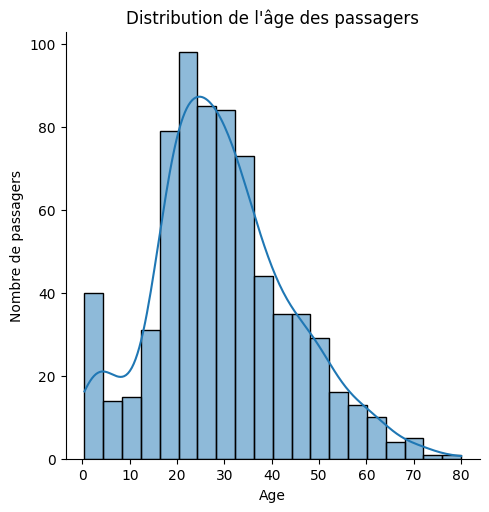

In [27]:
sns.displot(data_clean, x="Age", fill=True, kde=True)
plt.title("Distribution de l'âge des passagers")
plt.ylabel("Nombre de passagers")
plt.show()

Q1.3: Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.

**Hypothèse nulle :** L'âge moyen des passagers du Titanic est égal à l'âge moyen de la population en 1912 (donc 28 ans). H0 : μ = 28   
**Hypothèse alternative :** L'âge moyen des passagers du TItanic est différent de l'âge moyen de la population en 1912 (donc 28 ans). H1 : μ =/= 28



Q1.4: Identifier le test statistique approprié selon les hypothèses énoncées.



Nous devons réaliser un t-test pour un échantillon afin de comparer la moyenne de l'âge de notre échantillon à celle de la population de 1912, étant donné que nous n'avons pas la variance de la population.

Q1.5: Vérifier la validation des assumptions selon le test identifié.  
Pour le t-test, il s'agit des assomptions suivantes:  
- Echantillon aléatoire
- Taille de l'échantillon > 30 ou population normalement distribuée

Selon nous, l'échantillon est **aléatoire**. Il représente une partie des passagers et on estime qu'ils ont eu une chance égale d'y être inclus.   
Un doute se pose sur le pré-traitement que nous avons effectué: est-ce qu'en supprimer les lignes avec au moins une valeur manquante biaise le test ? On constate que les valeurs non renseignées concernent majoritairement l'âge des passagers de 3e classe.  
  
La taille de l'échantillon est largement supérieure à 30 

In [72]:
# Combien de passagers ont été enlevés dans le data set "clean", par catégorie ?
missing_values_by_class = data.groupby("Pclass", group_keys=False).apply( lambda x: x.isna().sum()[~x.isna().sum().index.isin(["PassengerId", "Cabin"])])

print("Répartition des valeurs manquantes par classe de passager :")
print(missing_values_by_class)


Répartition des valeurs manquantes par classe de passager :
        Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Embarked
Pclass                                                                        
1              0       0     0    0   30      0      0       0     0         2
2              0       0     0    0   11      0      0       0     0         0
3              0       0     0    0  136      0      0       0     0         0


C:\Users\marino casagranda\AppData\Local\Temp\ipykernel_4364\1970987710.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_by_class = data.groupby("Pclass", group_keys=False).apply( lambda x: x.isna().sum()[~x.isna().sum().index.isin(["PassengerId", "Cabin"])])


Q1.6: Calculer la statistique ainsi que la p-valeur.


In [78]:
mean_age = 28 # moyenne supposée

sample_size_age = len(data_clean["Age"]) 
sample_mean_age = np.mean(data_clean["Age"]) #moyenne 
sample_std_age = np.std(data_clean["Age"], ddof=1) #écart type
print ("Moyenne de l'âge sur le titanic :", sample_mean_age)


# Statistique t
t = (sample_mean_age - mean_age)/(sample_std_age / np.sqrt(sample_size_age))
print("Statistique t :", t)

# P-valeur
p_value = stats.t.cdf(-abs(t), df=sample_size_age-1) * 2
print("P-valeur :", p_value)

Moyenne de l'âge sur le titanic : 29.64209269662921
Statistique t : 3.0233009800374053
P-valeur : 0.002590259537786662


Q1.7: Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.

In [71]:
alpha = 0.05

if p_value < alpha:
    print("On rejette l'hypothèse nulle.")
else:
    print("On ne rejette pas l'hypothèse nulle.")

On rejette l'hypothèse nulle.


Q1.8: Interpréter le résultat et évaluer la taille de l'effet.

**Taille de l'effet:**

In [76]:
cohen_d = (sample_mean_age - mean_age) / sample_std_age
print("Taille de l'effet (Cohen's d) :", cohen_d)


if abs(cohen_d) < 0.2:
    print("Interprétation : Effet faible.")
elif abs(cohen_d) < 0.5:
    print("Interprétation : Effet modéré.")
elif abs(cohen_d) < 0.8:
    print("Interprétation : Effet moyen.")
else:
    print("Interprétation : Effet fort.")

Taille de l'effet (Cohen's d) : 0.11330299449551398
Interprétation : Effet faible.


**Interprétation**  
On constate une différence statistiquement significative entre l’âge moyen des passagers, 29.6 ans, et celui de la population mondiale en 1912, 28 ans.   
Avec une **statistique t de 3.02** et une **p-valeur de 0.0026**, on **rejette l’hypothèse nulle** selon laquelle les moyennes d'âges citées sont égales.  
Par contre, cette différence est d’une faible ampleur comme le démontre la **taille de l’effet, évaluée à 0.113**. En résumé, l’écart n’a pas vraiment d’importance notable.

De plus, le pré-traitement, lors duquel nous avons supprimé les lignes avec des valeurs manquantes, pourrait avoir introduit un biais. Les âges manquants concernent majoritairement les passagers de 3ᵉ classe, population principalement constituée de familles avec enfants et de jeunes. L’exclusion de ces données pourrait avoir entraîné une surestimation de l’âge moyen de l’échantillon.
 
Bien que le test montre une différence significative, nous jugeons celle-ci trop faible dans la réalité.

**Q2: La survie dépend-elle de la classe du passager?**
==============


Q2.1: Identifier la ou les variables d'intérêt et spécifier le type.

Q2.2: Réaliser une visualisation appropriée selon la ou les variables.


Q2.3: Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.

Q2.4: Identifier le test statistique approprié selon les hypothèses énoncées.



Q2.5: Vérifier la validation des assumptions selon le test identifié.

Q2.6: Calculer la statistique ainsi que la p-valeur.


Q2.7: Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.

Q2.8: Interpréter le résultat et évaluer la taille de l'effet.

**Q3: Existe-t-il une différence d'âge entre les passagers qui ont survécu et les passagers décédés?**
==============


Q3.1: Identifier la ou les variables d'intérêt et spécifier le type.

Q3.2: Réaliser une visualisation appropriée selon la ou les variables.


Q3.3: Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.

Q3.4: Identifier le test statistique approprié selon les hypothèses énoncées.



Q3.5: Vérifier la validation des assumptions selon le test identifié.

Q3.6: Calculer la statistique ainsi que la p-valeur.


Q3.7: Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.

Q3.8: Interpréter le résultat et évaluer la taille de l'effet.

**Q4: Existe-t-il une relation entre l'âge des passagers et le prix des billets?**
==============


Q4.1: Identifier la ou les variables d'intérêt et spécifier le type.

Q4.2: Réaliser une visualisation appropriée selon la ou les variables.


Q4.3: Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.

Q4.4: Identifier le test statistique approprié selon les hypothèses énoncées.



Q4.5: Vérifier la validation des assumptions selon le test identifié.

Q4.6: Calculer la statistique ainsi que la p-valeur.


Q4.7: Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.

Q4.8: Interpréter le résultat et évaluer la taille de l'effet.

Pour chacune des questions 1 à 4 ci-dessus, argumenter de manière statistique en effectuant chacune des étapes suivantes:
1. Identifier la ou les variables d'intérêt et spécifier le type.
2. Réaliser une visualisation appropriée selon la ou les variables.
3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.
4. Identifier le test statistique approprié selon les hypothèses énoncées.
5. Vérifier la validation des assumptions selon le test identifié.
6. Calculer la statistique ainsi que la p-valeur.
7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.
8. Interpréter le résultat et évaluer la taille de l'effet.

Quelques liens utiles pour la taille de l'effet:
* [https://rpsychologist.com/cohend/](https://rpsychologist.com/cohend/)
* [https://datatab.net/tutorial/effect-size-independent-t-test](https://datatab.net/tutorial/effect-size-independent-t-test)
* [https://www.simplypsychology.org/effect-size.html](https://www.simplypsychology.org/effect-size.html)

## 3. Data mining (2 pts)

**Q1: Effectuer une analyse statistique à l'aide de la régression logistique avec comme variable dépendente la variable `Survived`. Interpréter les coefficients et discuter de leur importance statistique en vous appuyant sur leur p-valeur.**

**Q2: Effecter une analyse statistique à l'aide d'un arbre de classification avec comme variable dépendente la variable `Survived` et une profondeur maximale de 4. Visualiser l'arbre et expliquer quelques décisions.**

**Conclusion: Interpréter les résultats des deux analyses statistiques et résumer les points importants de votre étude.**